In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
raw_df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\weatherAUS.csv")
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [18]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

<Axes: title={'center': 'No. of rows per year'}, xlabel='Date', ylabel='count'>

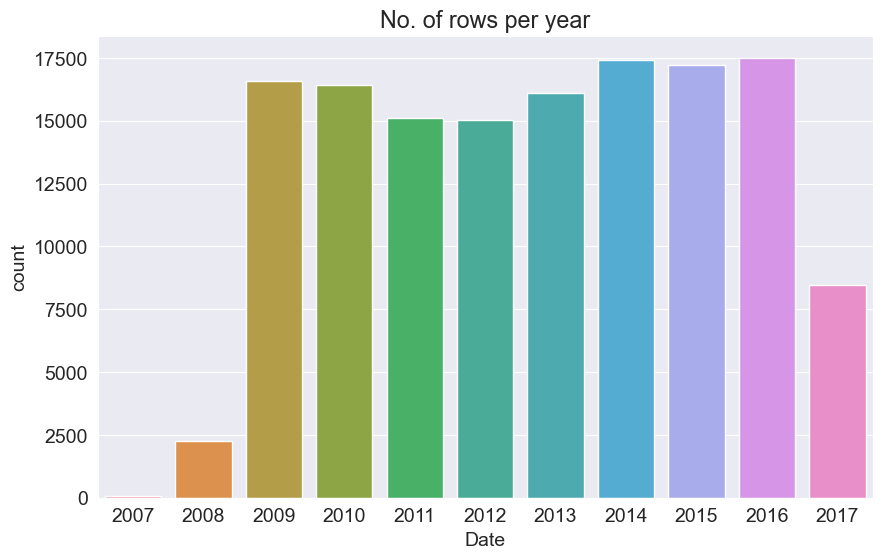

In [19]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [20]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]



In [21]:
print('train_df.shape :',train_df.shape)
print('val_df.shape :',val_df.shape)
print('test_df.shape :',test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [22]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [23]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [24]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [25]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [26]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [27]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [28]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,NaN,NaN,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8
144549,15.1,36.8,0.0,NaN,NaN,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8
144550,17.3,37.8,0.0,NaN,NaN,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7
144551,20.1,38.5,0.0,NaN,NaN,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2


In [29]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [32]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [33]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [34]:
#scalling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [38]:
val_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000
mean,0.488364,0.535061,0.005761,0.039356,0.529766,0.260422,0.106366,0.212012,0.681702,0.505003,0.635487,0.630258,0.496524,0.500679,0.512768,0.523809
std,0.154157,0.141075,0.022218,0.022895,0.176195,0.097937,0.066591,0.099354,0.197546,0.207120,0.111121,0.107516,0.255261,0.236935,0.143615,0.137566
min,0.007075,0.030246,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.000000,0.125620,0.081600,0.000000,0.000000,0.021097,0.026871
25%,0.376179,0.429112,0.000000,0.035862,0.525852,0.193798,0.053846,0.149425,0.560000,0.360000,0.568595,0.564800,0.333333,0.444444,0.409283,0.424184
50%,0.487887,0.525520,0.000000,0.037723,0.525852,0.255814,0.100000,0.214225,0.690000,0.514826,0.614876,0.611200,0.493021,0.500352,0.508439,0.518234
75%,0.601415,0.637051,0.001617,0.037723,0.565517,0.310078,0.146154,0.275862,0.830000,0.640000,0.705785,0.699200,0.666667,0.666667,0.616034,0.618042
max,0.952830,0.948960,0.666307,0.485517,1.000000,1.000000,0.669231,0.850575,1.000000,1.000000,0.971901,0.963200,0.888889,0.888889,0.943038,0.925144


In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder =  OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [41]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [42]:
train_encoded = pd.DataFrame(encoder.transform(train_inputs[categorical_cols].fillna('UnKnown')), 
                             columns=encoded_cols, index=train_inputs.index)

val_encoded = pd.DataFrame(encoder.transform(val_inputs[categorical_cols].fillna('UnKnown')), 
                           columns=encoded_cols, index=val_inputs.index)

test_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols].fillna('UnKnown')), 
                            columns=encoded_cols, index=test_inputs.index)


train_inputs = pd.concat([train_inputs, train_encoded], axis=1)
val_inputs = pd.concat([val_inputs, val_encoded], axis=1)
test_inputs = pd.concat([test_inputs, test_encoded], axis=1)

In [43]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [44]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [45]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(random_state=42)

In [48]:
%%time
model.fit(X_train,train_targets)

CPU times: total: 3.3 s
Wall time: 3.98 s


DecisionTreeClassifier(random_state=42)

In [49]:
#evaluation

In [50]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy_score(train_preds,train_targets)

0.9999797955307714

In [54]:
train_proba = model.predict_proba(X_train)
train_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [55]:
model.score(X_val,val_targets)

0.791654576054785

In [56]:
from sklearn.tree import plot_tree,export_text

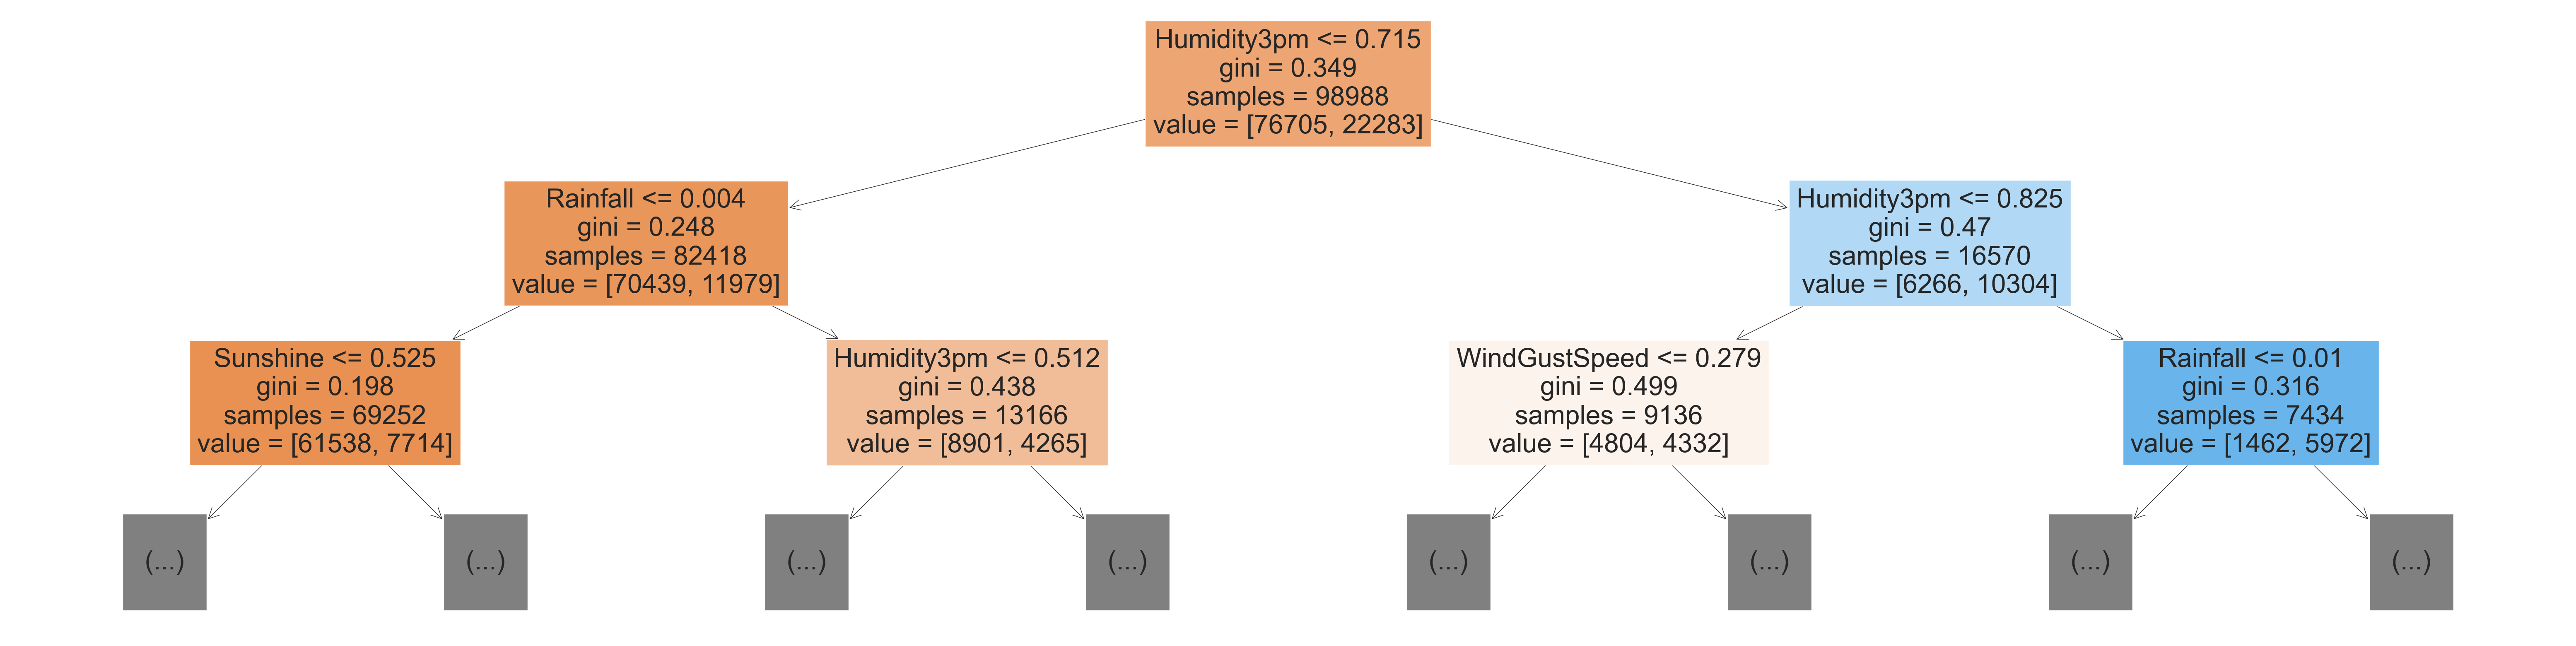

In [57]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns, max_depth=2,filled = True);


In [58]:
model.tree_.max_depth

48

In [59]:
model.feature_importances_

array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

In [60]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [61]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.262586
11,Pressure3pm,0.062530
2,Rainfall,0.058871
5,WindGustSpeed,0.055365
4,Sunshine,0.049735
8,Humidity9am,0.039490
10,Pressure9am,0.034650
0,MinTemp,0.034502
14,Temp9am,0.033443
1,MaxTemp,0.032698


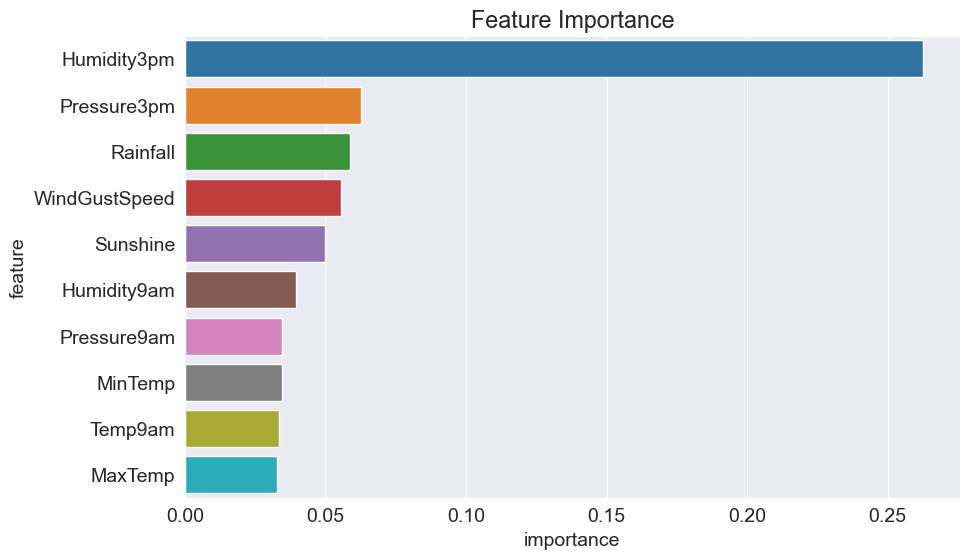

In [62]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance',y='feature');

In [63]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [64]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
model.score(X_train,train_targets)

0.8291308037337859

In [66]:
model.score(X_val,val_targets)

0.8334397307178921

In [67]:
model.classes_

array(['No', 'Yes'], dtype=object)

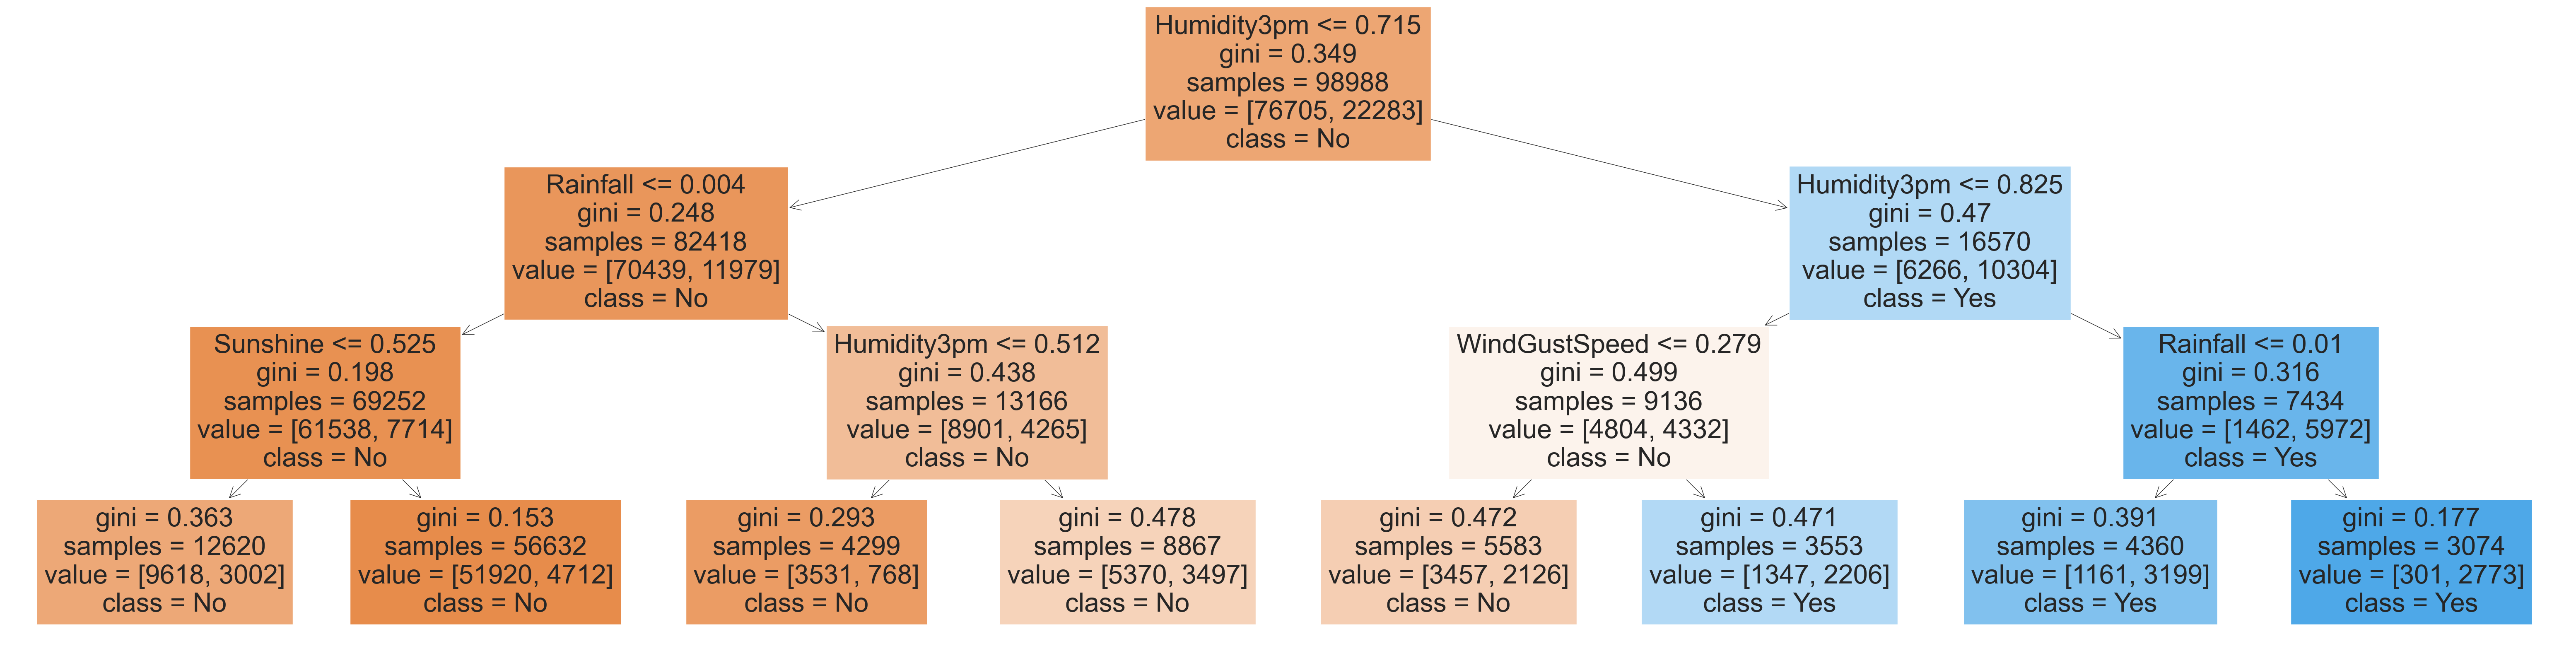

In [68]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,class_names=model.classes_);

In [69]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md, random_state=42)
    model.fit(X_train,train_targets)
    train_error = 1 - model.score(X_train,train_targets)
    val_error = 1 - model.score(X_val,val_targets)
    return {'Max Depth': md,'Training Error': train_error,'Validation Error': val_error}
    

In [70]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: total: 41 s
Wall time: 44 s


In [71]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140724,0.156346
9,10,0.132703,0.158319


In [72]:
 model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_targets)
 model.score(X_val,val_targets)

0.8452788578724392

In [73]:
model = DecisionTreeClassifier(max_leaf_nodes=128,random_state=42)

In [74]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [75]:
model.score(X_train,train_targets)

0.8480421869317493

In [76]:
model.score(X_val,val_targets)

0.8442342290058615

In [77]:
 model_text = export_text(model,feature_names=list(X_train.columns))
 print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
%%time
model = RandomForestClassifier( n_jobs=-1,random_state=42)

CPU times: total: 0 ns
Wall time: 1 ms


In [80]:
%%time
model.fit(X_train,train_targets)

CPU times: total: 53.2 s
Wall time: 7.79 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [81]:
model.score(X_train,train_targets)

0.9999595910615429

In [82]:
model.score(X_val,val_targets)

0.8553769369160235

In [83]:
train_probs =  model.predict_proba(X_train)
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

In [ ]:
model.estimators_[0]

In [85]:
len(model.estimators_)

100

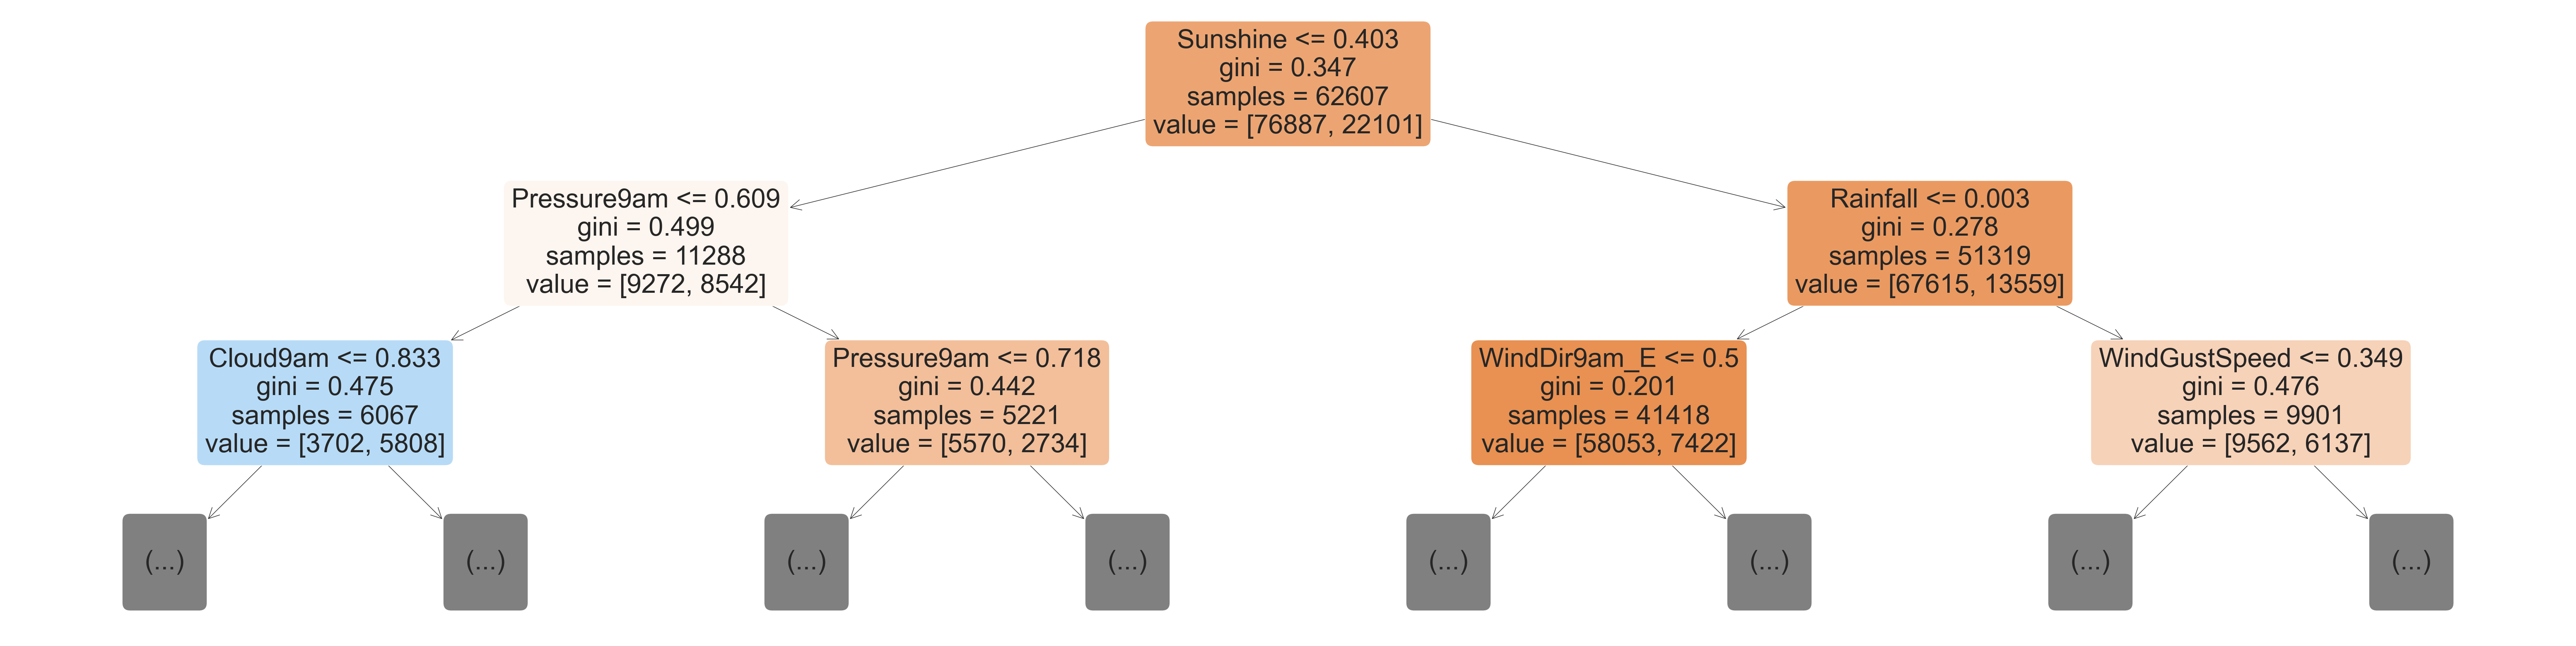

In [87]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);

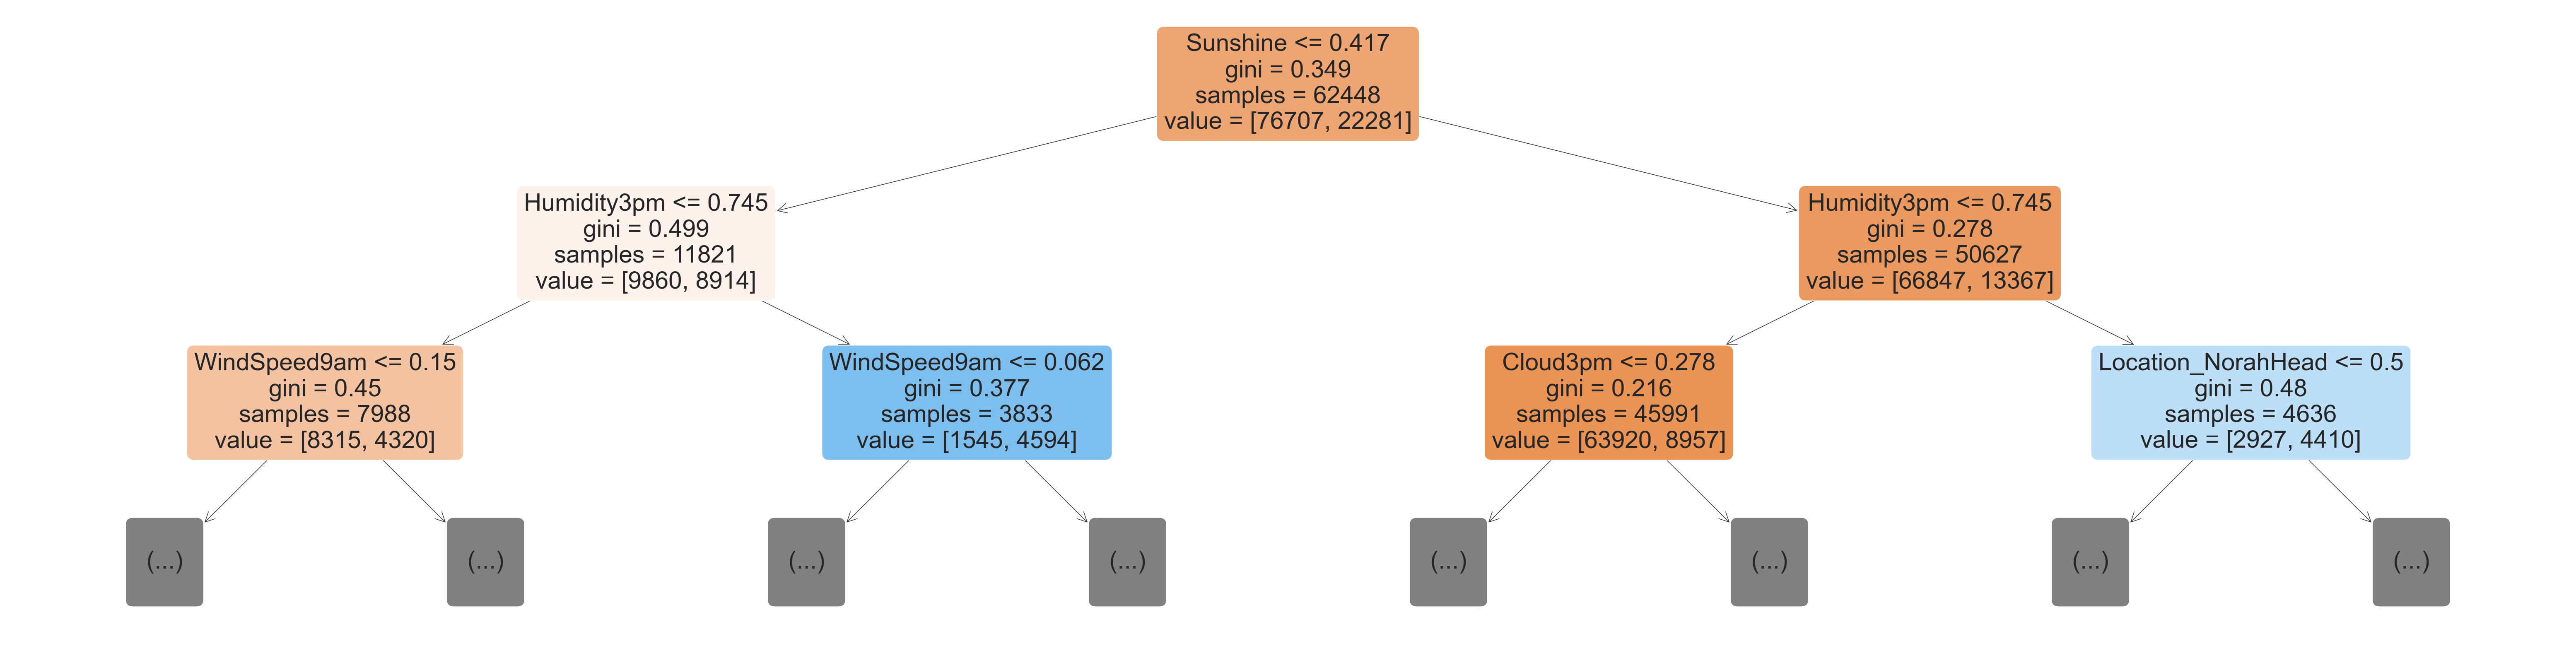

In [89]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2,feature_names=X_train.columns, filled=True,rounded = True);

In [92]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [93]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139391
4,Sunshine,0.055504
11,Pressure3pm,0.054219
8,Humidity9am,0.050754
10,Pressure9am,0.048210
5,WindGustSpeed,0.047833
2,Rainfall,0.047278
15,Temp3pm,0.045182
1,MaxTemp,0.041811
0,MinTemp,0.041537


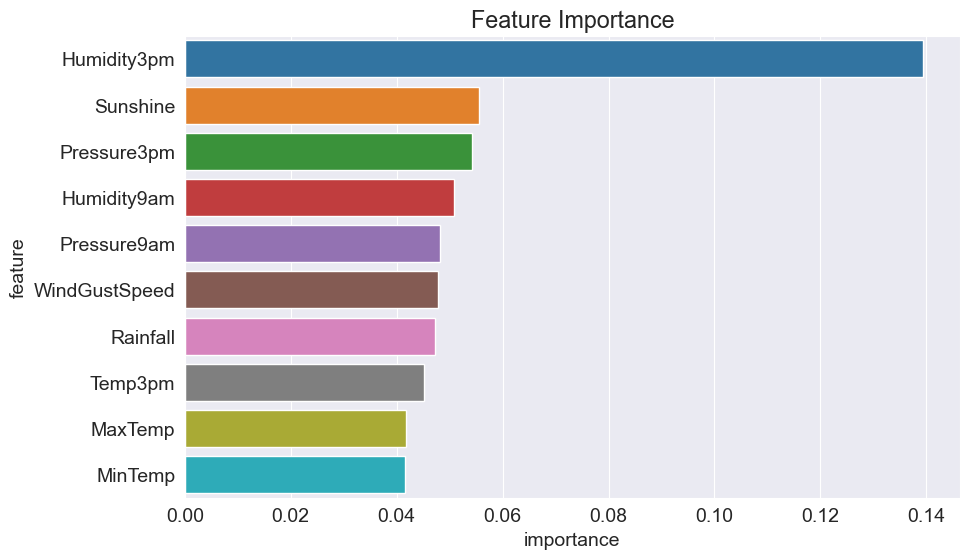

In [95]:
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x='importance',y='feature');

In [96]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [97]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [98]:
base_accs= base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8553769369160235)

In [99]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=10)

In [100]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [101]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9872105709783005, 0.8467297312982416)

In [102]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500)
model.fit(X_train,train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [107]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8566537055307295)

In [108]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [113]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,**params).fit(X_train, train_targets)
    return model.score(X_train,train_targets), model.score(X_val, val_targets)

In [116]:
test_params(max_depth=5)

(0.8209681981654342, 0.8250826997852707)

In [115]:
test_params(max_depth=26)

(0.9816543419404372, 0.8567697754047937)

In [117]:
test_params(max_leaf_nodes=2**20) 

(0.9999595910615429, 0.8572920898380825)

In [119]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [120]:
'''max_features
Instead of picking all features for every split, we can specify only a fraction of features to be chosen randomly.

Notice that the default value auto causes only rootn out of total features (n) to be chosen randomly at each split. This is the reason each decision tree is in the forest is different. 
While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical 
trees, so the random forest will not generalize well.'''

'max_features\nInstead of picking all features for every split, we can specify only a fraction of features to be chosen randomly.\n\nNotice that the default value auto causes only rootn out of total features (n) to be chosen randomly at each split. This is the reason each decision tree is in the forest is different. \nWhile it may seem counterintuitive, choosing all features for every split of every tree will lead to identical \ntrees, so the random forest will not generalize well.'

In [122]:
test_params(max_features='log2')

(0.9999494888269285, 0.8540421333642852)

In [123]:
test_params(max_features=3)

(0.9999393865923142, 0.8527653647495792)

In [124]:
test_params(max_features=20)

(0.9999595910615429, 0.8547965875457025)

In [125]:
#min_sample_split & min_sample_leaf

In [127]:
test_params(min_samples_split=5,min_samples_leaf=2)

(0.9570756051238534, 0.8562474609715048)

In [131]:
test_params(min_impurity_decrease=1e-6)

(0.9885541681820018, 0.8560153212233764)

In [129]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [130]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [132]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8586268933898207)

In [133]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [134]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8560153212233764)

In [135]:
#class_weight

In [136]:
train_targets.value_counts()/len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [138]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [139]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8552608670419592)

In [142]:
test_params(class_weight={'No': 1, 'Yes':2})

(0.9999393865923142, 0.8554349718530555)

In [143]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [162]:
model = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=700,
    random_state=42,
    max_features=7,
    max_depth=30,
    class_weight={'No':1,'Yes':2}
    
)

In [163]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=30,
                       max_features=7, n_estimators=700, n_jobs=-1,
                       random_state=42)

In [164]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9940497838121792, 0.8573501247751146)

In [165]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [166]:
model.score(X_test,test_targets)

0.8447678447678447